<a href="https://colab.research.google.com/github/JSJeong-me/KOSA-Python_Algorithm/blob/main/Tuesday/insert_sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 삽입 정렬(insertion sort)은 자료 배열의 모든 요소를 앞에서부터 차례대로 이미 정렬된 배열 부분과 비교하여, 자신의 위치를 찾아 삽입함으로써 정렬을 완성하는 알고리즘이다.

손안의 카드를 정렬하는 방법과 유사하다.
새로운 카드를 기존의 정렬된 카드 사이의 올바른 자리를 찾아 삽입한다.
새로 삽입될 카드의 수만큼 반복하게 되면 전체 카드가 정렬된다.
자료 배열의 모든 요소를 앞에서부터 차례대로 이미 정렬된 배열 부분과 비교 하여, 자신의 위치를 찾아 삽입함으로써 정렬을 완성하는 알고리즘
매 순서마다 해당 원소를 삽입할 수 있는 위치를 찾아 해당 위치에 넣는다.

https://ko.wikipedia.org/wiki/%EC%82%BD%EC%9E%85_%EC%A0%95%EB%A0%AC


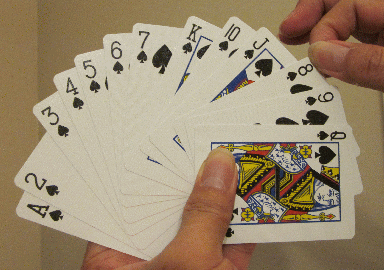

In [1]:
cards = [ 7, 6, 1, 8, 5, 3, 9, 4]

In [2]:
def insertion_sort_1(arr):
    for end in range(1, len(arr)):
        for i in range(end, 0, -1):
            if arr[i - 1] > arr[i]:
                arr[i - 1], arr[i] = arr[i], arr[i - 1]
    return arr

In [3]:
result_1 = insertion_sort_1(cards)

In [4]:
result_1

[1, 3, 4, 5, 6, 7, 8, 9]

최적화
기존에 있던 값들은 이전 패스에서 모두 정렬되었다는 점을 활용하면 불필요한 비교 작업을 제거할 수 있습니다. 예를 들면, 아래와 같이 기존 정렬 범위 [1, 2, 3, 5]에 4가 새롭게 추가된다면, 5는 4보다 크기 때문에 swap이 필요하지만, 3은 4보다 작기 때문에 swap이 필요없습니다. 그리고 3보다 앞에 있는 숫자들은 기존 패스에서 이미 정렬을 해놓았기 때문에 당연히 3보다는 작을 것이며, 더 이상의 4와 대소 비교는 무의미합니다. 이 사실을 이용하면, 새롭게 추가된 값보다 작은 숫자를 만나는 최초의 순간까지만 내부 반복문을 수행해도 됩니다.

이 최적화를 적용하면, 정렬된 배열이 들어올 경우, O(N)의 시간 복잡도를 달성할 수 있습니다. 예를 들어, 다음과 같이 5개의 숫자가 된 배열이 들어오면 각 패스 당 단 한 번 총 4번의 비교만으로 해당 배열이 완전히 정렬되었음을 알아내고 삽입 정렬을 완료할 수 있습니다.

In [5]:
cards = [ 7, 6, 1, 8, 5, 3, 9, 4]

In [6]:
def insertion_sort_2(arr):
    for end in range(1, len(arr)):
        i = end
        while i > 0 and arr[i - 1] > arr[i]:
            arr[i - 1], arr[i] = arr[i], arr[i - 1]
            i -= 1
    return arr

In [7]:
result_2 = insertion_sort_2(cards)

In [8]:
result_2

[1, 3, 4, 5, 6, 7, 8, 9]

추가 최적화
swap 작업없이 단순히 값들을 shift 시키는 것만으로도 삽입 정렬의 구현이 가능합니다. 앞의 값이 정렬 범위에 추가시킨 값보다 클 경우 앞의 값을 뒤로 밀다가 최초로 작은 값을 만나는 순간 그 뒤에 추가된 값을 꼽으면 됩니다.

In [9]:
cards = [ 7, 6, 1, 8, 5, 3, 9, 4]

In [10]:
def insertion_sort(arr):
    # Insertion Sort
    # arr --> unsorted array
    
    # loop over unsorted sub-array
    for i in range(1, len(arr)):
        # x --> first value in unsorted sub-array
        x = arr[i]
        print('{} {} {}'.format(i, x, arr))
        # j --> current index in sorted sub-array
        j = i-1
        # move backwards through sorted array
        # until list exhausted or x >= sorted array value
        while j >= 0 and x < arr[j] :
                arr[j + 1] = arr[j] 
                j -= 1
        # insert x when j is correct index
        arr[j + 1] = x
    
    return arr

cards = [ 7, 6, 1, 8, 5, 3, 9, 4]

In [11]:
result = insertion_sort(cards)

1 6 [7, 6, 1, 8, 5, 3, 9, 4]
2 1 [6, 7, 1, 8, 5, 3, 9, 4]
3 8 [1, 6, 7, 8, 5, 3, 9, 4]
4 5 [1, 6, 7, 8, 5, 3, 9, 4]
5 3 [1, 5, 6, 7, 8, 3, 9, 4]
6 9 [1, 3, 5, 6, 7, 8, 9, 4]
7 4 [1, 3, 5, 6, 7, 8, 9, 4]


In [12]:
result

[1, 3, 4, 5, 6, 7, 8, 9]